In [1]:
# Example of the comparison of two data cubes using the astroHOG 
# 
# Prepared by Juan D. Soler (juandiegosoler@gmail.com)

import sys
sys.path.append('../')
from astrohog2d import *
from astrohog2d1v import *

import matplotlib.pyplot as plt
from astropy.io import fits

from scipy import ndimage

In [2]:
# Load the cubes that you plan to compare
# Just for reference, I assume that the first index runs over the non-spatial coordinate
# Also assume that the cubes are spatially aligned and are reprojected into the same grid 

hdul = fits.open('../data/testcube1.fits')
cube1=hdul[0].data
hdul.close()
hdul = fits.open('../data/testcube2.fits')
cube2=hdul[0].data
hdul.close()

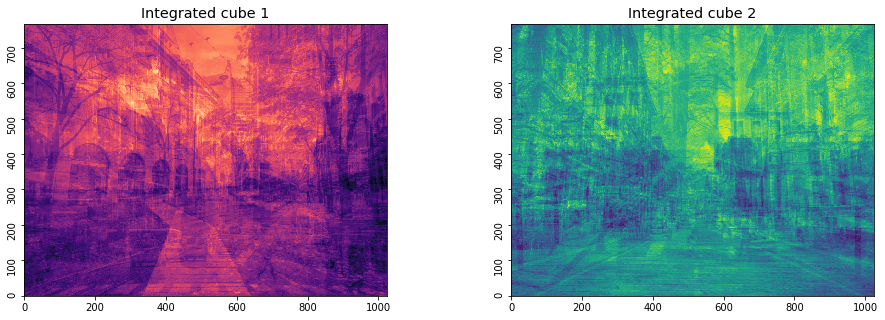

In [3]:
fig, ax = plt.subplots(1,2, figsize=(16., 5.))
plt.rc('font', size=12)
ax[0].imshow(cube1.sum(axis=0), origin='lower', cmap='magma', interpolation='none')
ax[0].set_title('Integrated cube 1')
ax[0].tick_params(axis='y',labelrotation=90)
ax[1].imshow(cube2.sum(axis=0), origin='lower', cmap='viridis', interpolation='none')
ax[1].set_title('Integrated cube 2')
ax[1].tick_params(axis='y',labelrotation=90)
plt.show()

In [4]:
# Here you select the size of your derivative kernel in pixels
ksz=10

In [5]:
# Here I define the masks for both cubes
# For the sake of simplicity, I'm only masking the edges of the cubes
sz1=np.shape(cube1)
mask1=1.+0.*cube1
mask1[:,0:ksz,:]=0.
mask1[:,sz1[1]-1-ksz:sz1[1]-1,:]=0.
mask1[:,:,0:ksz]=0.
mask1[:,:,sz1[2]-1-ksz:sz1[2]-1]=0.
sz2=np.shape(cube2)
mask2=1.+0.*cube2
mask2[:,0:ksz,:]=0.
mask2[:,sz2[1]-1-ksz:sz2[1]-1,:]=0.
mask2[:,:,0:ksz]=0.
mask2[:,:,sz2[2]-1-ksz:sz2[2]-1]=0.

In [6]:
# Here you define the channel ranges over which you want to compare the cubes
zmin1=0
zmax1=sz1[0]-1
zmin2=0
zmax2=sz2[0]-1

In [7]:
# Statistical weights to account for the number of independent gradient pairs within a kernel
weights=(1./ksz)**2

In [8]:
# Run the HOG
circstats, corrcube, scube1, scube2 = HOGcorr_ppvcubes(cube1, cube2, zmin1, zmax1, zmin2, zmax2, ksz=ksz, mask1=mask1, mask2=mask2, weights=weights)

  0%|          | 0/25 [00:00<?, ?it/s]

Computing HOG correlation
6 6
Channel 0/5 and 0/5
Montecarlo iterations disabled =============================


  4%|▍         | 1/25 [00:00<00:09,  2.58it/s]

Channel 0/5 and 1/5
Montecarlo iterations disabled =============================


  8%|▊         | 2/25 [00:00<00:08,  2.64it/s]

Channel 0/5 and 2/5
Montecarlo iterations disabled =============================


 12%|█▏        | 3/25 [00:01<00:08,  2.67it/s]

Channel 0/5 and 3/5
Montecarlo iterations disabled =============================


 16%|█▌        | 4/25 [00:01<00:07,  2.74it/s]

Channel 0/5 and 4/5
Montecarlo iterations disabled =============================


 20%|██        | 5/25 [00:01<00:07,  2.79it/s]

Channel 0/5 and 5/5
Montecarlo iterations disabled =============================


 24%|██▍       | 6/25 [00:02<00:06,  2.82it/s]

Channel 1/5 and 0/5
Montecarlo iterations disabled =============================


 28%|██▊       | 7/25 [00:02<00:06,  2.83it/s]

Channel 1/5 and 1/5
Montecarlo iterations disabled =============================


 32%|███▏      | 8/25 [00:02<00:05,  2.83it/s]

Channel 1/5 and 2/5
Montecarlo iterations disabled =============================


 36%|███▌      | 9/25 [00:03<00:05,  2.84it/s]

Channel 1/5 and 3/5
Montecarlo iterations disabled =============================


 40%|████      | 10/25 [00:03<00:05,  2.85it/s]

Channel 1/5 and 4/5
Montecarlo iterations disabled =============================


 44%|████▍     | 11/25 [00:03<00:04,  2.86it/s]

Channel 1/5 and 5/5
Montecarlo iterations disabled =============================


 48%|████▊     | 12/25 [00:04<00:04,  2.87it/s]

Channel 2/5 and 0/5
Montecarlo iterations disabled =============================


 52%|█████▏    | 13/25 [00:04<00:04,  2.87it/s]

Channel 2/5 and 1/5
Montecarlo iterations disabled =============================


 56%|█████▌    | 14/25 [00:04<00:03,  2.84it/s]

Channel 2/5 and 2/5
Montecarlo iterations disabled =============================


 60%|██████    | 15/25 [00:05<00:03,  2.90it/s]

Channel 2/5 and 3/5
Montecarlo iterations disabled =============================


 64%|██████▍   | 16/25 [00:05<00:03,  2.89it/s]

Channel 2/5 and 4/5
Montecarlo iterations disabled =============================


 68%|██████▊   | 17/25 [00:05<00:02,  2.90it/s]

Channel 2/5 and 5/5
Montecarlo iterations disabled =============================


 72%|███████▏  | 18/25 [00:06<00:02,  2.91it/s]

Channel 3/5 and 0/5
Montecarlo iterations disabled =============================


 76%|███████▌  | 19/25 [00:06<00:02,  2.90it/s]

Channel 3/5 and 1/5
Montecarlo iterations disabled =============================


 80%|████████  | 20/25 [00:07<00:01,  2.88it/s]

Channel 3/5 and 2/5
Montecarlo iterations disabled =============================


 84%|████████▍ | 21/25 [00:07<00:01,  2.89it/s]

Channel 3/5 and 3/5
Montecarlo iterations disabled =============================


 88%|████████▊ | 22/25 [00:07<00:01,  2.88it/s]

Channel 3/5 and 4/5
Montecarlo iterations disabled =============================


 92%|█████████▏| 23/25 [00:08<00:00,  2.91it/s]

Channel 3/5 and 5/5
Montecarlo iterations disabled =============================


 96%|█████████▌| 24/25 [00:08<00:00,  2.92it/s]

Channel 4/5 and 0/5
Montecarlo iterations disabled =============================


100%|██████████| 25/25 [00:08<00:00,  2.91it/s]

Channel 4/5 and 1/5
Montecarlo iterations disabled =============================


26it [00:09,  2.89it/s]                        

Channel 4/5 and 2/5
Montecarlo iterations disabled =============================


27it [00:09,  2.89it/s]

Channel 4/5 and 3/5
Montecarlo iterations disabled =============================


28it [00:09,  2.89it/s]

Channel 4/5 and 4/5
Montecarlo iterations disabled =============================


29it [00:10,  2.91it/s]

Channel 4/5 and 5/5
Montecarlo iterations disabled =============================


30it [00:10,  2.91it/s]

Channel 5/5 and 0/5
Montecarlo iterations disabled =============================


31it [00:10,  2.93it/s]

Channel 5/5 and 1/5
Montecarlo iterations disabled =============================


32it [00:11,  2.93it/s]

Channel 5/5 and 2/5
Montecarlo iterations disabled =============================


33it [00:11,  2.95it/s]

Channel 5/5 and 3/5
Montecarlo iterations disabled =============================


34it [00:11,  2.96it/s]

Channel 5/5 and 4/5
Montecarlo iterations disabled =============================


35it [00:12,  2.99it/s]

Channel 5/5 and 5/5
Montecarlo iterations disabled =============================


36it [00:12,  2.88it/s]


In [9]:
# The outputs are: 
# 1. 'corrplane' an array with all of the metrics to evaluate the correlation between the cubes
np.shape(circstats['V'])
vplane=circstats['V']
vvec=np.sort(np.ravel(vplane))[::-1]
indmax1, indmax2 =(vplane == vvec[0]).nonzero()

In [10]:
# 2. 'corrcube', which is the array containing all the relative orientation angles between gradients
np.shape(corrcube)

(6, 6, 768, 1024)

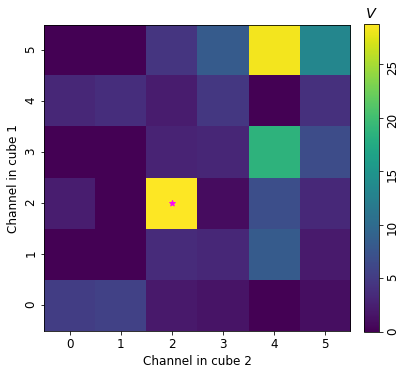

In [11]:
# Here for example, we show the projected Rayleight statistic (V)
# Large V values indicate that the angle distribution is not flat and is centred on zero
# V values around zero correspond to a flat angle distribution.

fig, ax = plt.subplots(1,1, figsize=(6., 6.))
plt.rc('font', size=12)
im=ax.imshow(circstats['V'], origin='lower',clim=[0.,np.nanmax(circstats['V'])], interpolation='None')
ax.scatter(indmax1, indmax2, marker='*', color='magenta')
ax.set_xlabel('Channel in cube 2')
ax.set_ylabel('Channel in cube 1')
ax.tick_params(axis='y',labelrotation=90)
cbl=plt.colorbar(im, fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$V$')
cbl.ax.tick_params(axis='y',labelrotation=90)
plt.show()

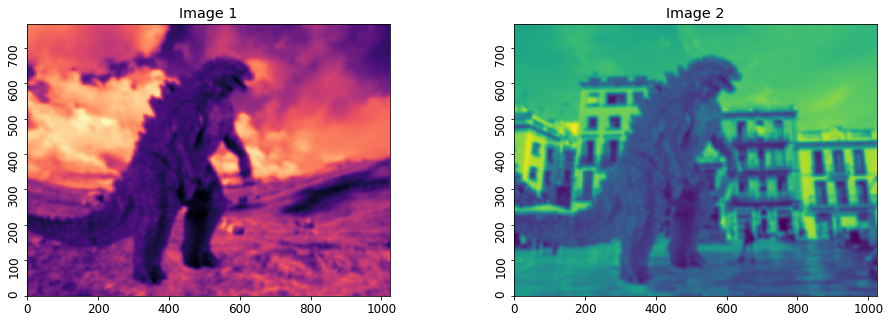

In [12]:
# Plot the pair of channels with the highest spatial correlations
#
#

fig, ax = plt.subplots(1,2, figsize=(16., 5.))
ax[0].imshow(scube1[indmax1[0],:,:], origin='lower', cmap='magma', interpolation='none')
ax[0].set_title('Image 1')
ax[0].tick_params(axis='y',labelrotation=90)
ax[1].imshow(scube2[indmax2[0],:,:], origin='lower', cmap='viridis', interpolation='none')
ax[1].set_title('Image 2')
ax[1].tick_params(axis='y',labelrotation=90)
plt.show()


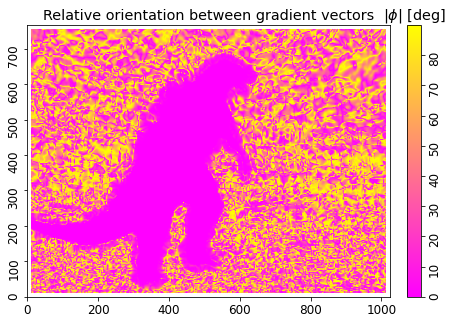

In [13]:
# Plot the relative orientation angle between the gradients in the two images with the highest correlation
#
#
fig, ax = plt.subplots(1,1, figsize=(8., 5.))
im=ax.imshow(np.abs(corrcube[indmax1[0],indmax2[0],:,:])*180.0/np.pi, origin='lower', cmap='spring',interpolation='None')
ax.tick_params(axis='y',labelrotation=90)
cbl=plt.colorbar(im,fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$|\phi|$ [deg]')
cbl.ax.tick_params(axis='y',labelrotation=90)
ax.set_title('Relative orientation between gradient vectors')
plt.show()

In [14]:
# Making block average with block size matching the kernel size
sz=np.shape(cube1)
nbyA=8; nbxA=int(np.ceil(nbyA*sz[1]/sz[2]))
vblocksA=imablockaverage(corrcube[indmax1[0],indmax2[0],:,:], nbx=nbxA, nby=nbyA, weight=(1./ksz)**2)

In [15]:
# Making block average with block size matching the kernel size
nbyB=int(0.25*sz[2]/ksz); nbxB=int(nbyB*sz[1]/sz[2])
vblocksB=imablockaverage(corrcube[indmax1[0],indmax2[0],:,:], nbx=nbxB, nby=nbyB, weight=(1./ksz)**2)

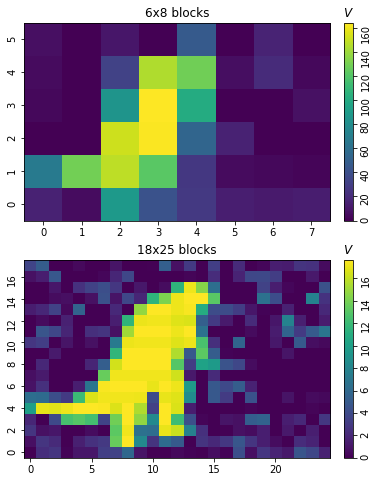

In [16]:
fig = plt.figure(figsize=(6.0, 8.0))
plt.rc('font', size=10)
ax1=plt.subplot(211)
ax1.set_title(str(nbxA)+'x'+str(nbyA)+' blocks')
im=ax1.imshow(vblocksA, origin='lower', vmin=0., interpolation='none', aspect='auto')
ax1.tick_params(axis='y',labelrotation=90)
cbl=plt.colorbar(im,fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$V$')
cbl.ax.tick_params(axis='y',labelrotation=90)
ax2=plt.subplot(212)
ax2.set_title(str(nbxB)+'x'+str(nbyB)+' blocks')
im=ax2.imshow(vblocksB, origin='lower', vmin=0., interpolation='none', aspect='auto')
ax2.tick_params(axis='y',labelrotation=90)
cbl=plt.colorbar(im,fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$V$')
cbl.ax.tick_params(axis='y',labelrotation=90)
plt.show()

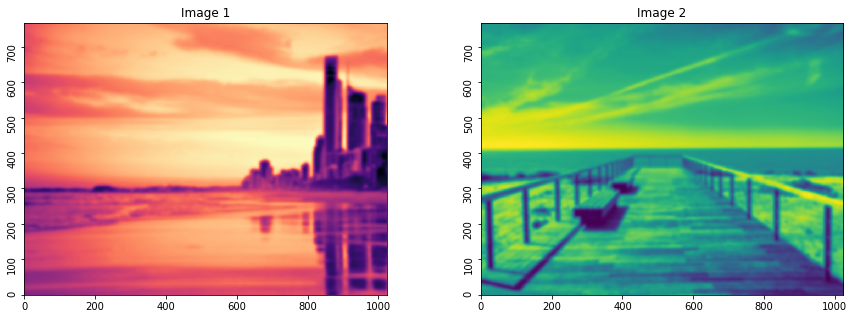

In [17]:
# Plot the pair of channels with the second highest spatial correlations
#
#
indmax1, indmax2 =(vplane == vvec[1]).nonzero()

fig, ax = plt.subplots(1,2, figsize=(15., 5.))
ax[0].imshow(scube1[indmax1[0],:,:], origin='lower', cmap='magma', interpolation='none')
ax[0].set_title('Image 1')
ax[0].tick_params(axis='y',labelrotation=90)
ax[1].imshow(scube2[indmax2[0],:,:], origin='lower', cmap='viridis', interpolation='none')
ax[1].set_title('Image 2')
ax[1].tick_params(axis='y',labelrotation=90)
plt.show()

In [18]:
# Running the jackknife tests
circstats01, corrcube01, scube1j01, scube2j01 = HOGcorr_ppvcubes(cube1, cube2[:,:,::-1], zmin1, zmax1, zmin2, zmax2, ksz=ksz, mask1=mask1, mask2=mask2, weights=weights)
vplane01=circstats01['V']
circstats10, corrcube10, scube1j10, scube2j10 = HOGcorr_ppvcubes(cube1, cube2[:,::-1,:], zmin1, zmax1, zmin2, zmax2, ksz=ksz, mask1=mask1, mask2=mask2, weights=weights)
vplane10=circstats10['V']
circstats11, corrcube11, scube1j11, scube2j11 = HOGcorr_ppvcubes(cube1, cube2[:,::-1,::-1], zmin1, zmax1, zmin2, zmax2, ksz=ksz, mask1=mask1, mask2=mask2, weights=weights)
vplane11=circstats11['V']

  0%|          | 0/25 [00:00<?, ?it/s]

Computing HOG correlation
6 6
Channel 0/5 and 0/5
Montecarlo iterations disabled =============================


  4%|▍         | 1/25 [00:00<00:08,  2.87it/s]

Channel 0/5 and 1/5
Montecarlo iterations disabled =============================


  8%|▊         | 2/25 [00:00<00:08,  2.86it/s]

Channel 0/5 and 2/5
Montecarlo iterations disabled =============================


 12%|█▏        | 3/25 [00:01<00:07,  2.87it/s]

Channel 0/5 and 3/5
Montecarlo iterations disabled =============================


 16%|█▌        | 4/25 [00:01<00:07,  2.86it/s]

Channel 0/5 and 4/5
Montecarlo iterations disabled =============================


 20%|██        | 5/25 [00:01<00:06,  2.87it/s]

Channel 0/5 and 5/5
Montecarlo iterations disabled =============================


 24%|██▍       | 6/25 [00:02<00:06,  2.85it/s]

Channel 1/5 and 0/5
Montecarlo iterations disabled =============================


 28%|██▊       | 7/25 [00:02<00:06,  2.87it/s]

Channel 1/5 and 1/5
Montecarlo iterations disabled =============================


 32%|███▏      | 8/25 [00:02<00:05,  2.83it/s]

Channel 1/5 and 2/5
Montecarlo iterations disabled =============================


 36%|███▌      | 9/25 [00:03<00:05,  2.84it/s]

Channel 1/5 and 3/5
Montecarlo iterations disabled =============================


 40%|████      | 10/25 [00:03<00:05,  2.85it/s]

Channel 1/5 and 4/5
Montecarlo iterations disabled =============================


 44%|████▍     | 11/25 [00:03<00:04,  2.85it/s]

Channel 1/5 and 5/5
Montecarlo iterations disabled =============================


 48%|████▊     | 12/25 [00:04<00:04,  2.87it/s]

Channel 2/5 and 0/5
Montecarlo iterations disabled =============================


 52%|█████▏    | 13/25 [00:04<00:04,  2.86it/s]

Channel 2/5 and 1/5
Montecarlo iterations disabled =============================


 56%|█████▌    | 14/25 [00:04<00:03,  2.85it/s]

Channel 2/5 and 2/5
Montecarlo iterations disabled =============================


 60%|██████    | 15/25 [00:05<00:03,  2.85it/s]

Channel 2/5 and 3/5
Montecarlo iterations disabled =============================


 64%|██████▍   | 16/25 [00:05<00:03,  2.85it/s]

Channel 2/5 and 4/5
Montecarlo iterations disabled =============================


 68%|██████▊   | 17/25 [00:05<00:02,  2.88it/s]

Channel 2/5 and 5/5
Montecarlo iterations disabled =============================


 72%|███████▏  | 18/25 [00:06<00:02,  2.88it/s]

Channel 3/5 and 0/5
Montecarlo iterations disabled =============================


 76%|███████▌  | 19/25 [00:06<00:02,  2.88it/s]

Channel 3/5 and 1/5
Montecarlo iterations disabled =============================


 80%|████████  | 20/25 [00:06<00:01,  2.86it/s]

Channel 3/5 and 2/5
Montecarlo iterations disabled =============================


 84%|████████▍ | 21/25 [00:07<00:01,  2.88it/s]

Channel 3/5 and 3/5
Montecarlo iterations disabled =============================


 88%|████████▊ | 22/25 [00:07<00:01,  2.87it/s]

Channel 3/5 and 4/5
Montecarlo iterations disabled =============================


 92%|█████████▏| 23/25 [00:08<00:00,  2.89it/s]

Channel 3/5 and 5/5
Montecarlo iterations disabled =============================


 96%|█████████▌| 24/25 [00:08<00:00,  2.87it/s]

Channel 4/5 and 0/5
Montecarlo iterations disabled =============================


100%|██████████| 25/25 [00:08<00:00,  2.86it/s]

Channel 4/5 and 1/5
Montecarlo iterations disabled =============================


26it [00:09,  2.84it/s]                        

Channel 4/5 and 2/5
Montecarlo iterations disabled =============================


27it [00:09,  2.84it/s]

Channel 4/5 and 3/5
Montecarlo iterations disabled =============================


28it [00:09,  2.84it/s]

Channel 4/5 and 4/5
Montecarlo iterations disabled =============================


29it [00:10,  2.84it/s]

Channel 4/5 and 5/5
Montecarlo iterations disabled =============================


30it [00:10,  2.76it/s]

Channel 5/5 and 0/5
Montecarlo iterations disabled =============================


31it [00:10,  2.82it/s]

Channel 5/5 and 1/5
Montecarlo iterations disabled =============================


32it [00:11,  2.84it/s]

Channel 5/5 and 2/5
Montecarlo iterations disabled =============================


33it [00:11,  2.87it/s]

Channel 5/5 and 3/5
Montecarlo iterations disabled =============================


34it [00:11,  2.88it/s]

Channel 5/5 and 4/5
Montecarlo iterations disabled =============================


35it [00:12,  2.90it/s]

Channel 5/5 and 5/5
Montecarlo iterations disabled =============================


36it [00:12,  2.86it/s]
  0%|          | 0/25 [00:00<?, ?it/s]

Computing HOG correlation
6 6
Channel 0/5 and 0/5
Montecarlo iterations disabled =============================


  4%|▍         | 1/25 [00:00<00:08,  2.83it/s]

Channel 0/5 and 1/5
Montecarlo iterations disabled =============================


  8%|▊         | 2/25 [00:00<00:08,  2.71it/s]

Channel 0/5 and 2/5
Montecarlo iterations disabled =============================


 12%|█▏        | 3/25 [00:01<00:08,  2.71it/s]

Channel 0/5 and 3/5
Montecarlo iterations disabled =============================


 16%|█▌        | 4/25 [00:01<00:07,  2.78it/s]

Channel 0/5 and 4/5
Montecarlo iterations disabled =============================


 20%|██        | 5/25 [00:01<00:07,  2.84it/s]

Channel 0/5 and 5/5
Montecarlo iterations disabled =============================


 24%|██▍       | 6/25 [00:02<00:06,  2.87it/s]

Channel 1/5 and 0/5
Montecarlo iterations disabled =============================


 28%|██▊       | 7/25 [00:02<00:06,  2.87it/s]

Channel 1/5 and 1/5
Montecarlo iterations disabled =============================


 32%|███▏      | 8/25 [00:02<00:05,  2.87it/s]

Channel 1/5 and 2/5
Montecarlo iterations disabled =============================


 36%|███▌      | 9/25 [00:03<00:05,  2.89it/s]

Channel 1/5 and 3/5
Montecarlo iterations disabled =============================


 40%|████      | 10/25 [00:03<00:05,  2.89it/s]

Channel 1/5 and 4/5
Montecarlo iterations disabled =============================


 44%|████▍     | 11/25 [00:03<00:04,  2.92it/s]

Channel 1/5 and 5/5
Montecarlo iterations disabled =============================


 48%|████▊     | 12/25 [00:04<00:04,  2.93it/s]

Channel 2/5 and 0/5
Montecarlo iterations disabled =============================


 52%|█████▏    | 13/25 [00:04<00:04,  2.93it/s]

Channel 2/5 and 1/5
Montecarlo iterations disabled =============================


 56%|█████▌    | 14/25 [00:04<00:03,  2.91it/s]

Channel 2/5 and 2/5
Montecarlo iterations disabled =============================


 60%|██████    | 15/25 [00:05<00:03,  2.90it/s]

Channel 2/5 and 3/5
Montecarlo iterations disabled =============================


 64%|██████▍   | 16/25 [00:05<00:03,  2.90it/s]

Channel 2/5 and 4/5
Montecarlo iterations disabled =============================


 68%|██████▊   | 17/25 [00:05<00:02,  2.92it/s]

Channel 2/5 and 5/5
Montecarlo iterations disabled =============================


 72%|███████▏  | 18/25 [00:06<00:02,  2.91it/s]

Channel 3/5 and 0/5
Montecarlo iterations disabled =============================


 76%|███████▌  | 19/25 [00:06<00:02,  2.89it/s]

Channel 3/5 and 1/5
Montecarlo iterations disabled =============================


 80%|████████  | 20/25 [00:06<00:01,  2.86it/s]

Channel 3/5 and 2/5
Montecarlo iterations disabled =============================


 84%|████████▍ | 21/25 [00:07<00:01,  2.85it/s]

Channel 3/5 and 3/5
Montecarlo iterations disabled =============================


 88%|████████▊ | 22/25 [00:07<00:01,  2.83it/s]

Channel 3/5 and 4/5
Montecarlo iterations disabled =============================


 92%|█████████▏| 23/25 [00:08<00:00,  2.86it/s]

Channel 3/5 and 5/5
Montecarlo iterations disabled =============================


 96%|█████████▌| 24/25 [00:08<00:00,  2.87it/s]

Channel 4/5 and 0/5
Montecarlo iterations disabled =============================


100%|██████████| 25/25 [00:08<00:00,  2.87it/s]

Channel 4/5 and 1/5
Montecarlo iterations disabled =============================


26it [00:09,  2.84it/s]                        

Channel 4/5 and 2/5
Montecarlo iterations disabled =============================


27it [00:09,  2.83it/s]

Channel 4/5 and 3/5
Montecarlo iterations disabled =============================


28it [00:09,  2.83it/s]

Channel 4/5 and 4/5
Montecarlo iterations disabled =============================


29it [00:10,  2.83it/s]

Channel 4/5 and 5/5
Montecarlo iterations disabled =============================


30it [00:10,  2.82it/s]

Channel 5/5 and 0/5
Montecarlo iterations disabled =============================


31it [00:10,  2.85it/s]

Channel 5/5 and 1/5
Montecarlo iterations disabled =============================


32it [00:11,  2.86it/s]

Channel 5/5 and 2/5
Montecarlo iterations disabled =============================


33it [00:11,  2.84it/s]

Channel 5/5 and 3/5
Montecarlo iterations disabled =============================


34it [00:11,  2.87it/s]

Channel 5/5 and 4/5
Montecarlo iterations disabled =============================


35it [00:12,  2.91it/s]

Channel 5/5 and 5/5
Montecarlo iterations disabled =============================


36it [00:12,  2.86it/s]
  0%|          | 0/25 [00:00<?, ?it/s]

Computing HOG correlation
6 6
Channel 0/5 and 0/5
Montecarlo iterations disabled =============================


  4%|▍         | 1/25 [00:00<00:08,  2.85it/s]

Channel 0/5 and 1/5
Montecarlo iterations disabled =============================


  8%|▊         | 2/25 [00:00<00:08,  2.78it/s]

Channel 0/5 and 2/5
Montecarlo iterations disabled =============================


 12%|█▏        | 3/25 [00:01<00:07,  2.77it/s]

Channel 0/5 and 3/5
Montecarlo iterations disabled =============================


 16%|█▌        | 4/25 [00:01<00:07,  2.78it/s]

Channel 0/5 and 4/5
Montecarlo iterations disabled =============================


 20%|██        | 5/25 [00:01<00:07,  2.80it/s]

Channel 0/5 and 5/5
Montecarlo iterations disabled =============================


 24%|██▍       | 6/25 [00:02<00:06,  2.79it/s]

Channel 1/5 and 0/5
Montecarlo iterations disabled =============================


 28%|██▊       | 7/25 [00:02<00:06,  2.80it/s]

Channel 1/5 and 1/5
Montecarlo iterations disabled =============================


 32%|███▏      | 8/25 [00:02<00:06,  2.76it/s]

Channel 1/5 and 2/5
Montecarlo iterations disabled =============================


 36%|███▌      | 9/25 [00:03<00:05,  2.77it/s]

Channel 1/5 and 3/5
Montecarlo iterations disabled =============================


 40%|████      | 10/25 [00:03<00:05,  2.78it/s]

Channel 1/5 and 4/5
Montecarlo iterations disabled =============================


 44%|████▍     | 11/25 [00:03<00:05,  2.80it/s]

Channel 1/5 and 5/5
Montecarlo iterations disabled =============================


 48%|████▊     | 12/25 [00:04<00:04,  2.82it/s]

Channel 2/5 and 0/5
Montecarlo iterations disabled =============================


 52%|█████▏    | 13/25 [00:04<00:04,  2.83it/s]

Channel 2/5 and 1/5
Montecarlo iterations disabled =============================


 56%|█████▌    | 14/25 [00:04<00:03,  2.82it/s]

Channel 2/5 and 2/5
Montecarlo iterations disabled =============================


 60%|██████    | 15/25 [00:05<00:03,  2.85it/s]

Channel 2/5 and 3/5
Montecarlo iterations disabled =============================


 64%|██████▍   | 16/25 [00:05<00:03,  2.84it/s]

Channel 2/5 and 4/5
Montecarlo iterations disabled =============================


 68%|██████▊   | 17/25 [00:06<00:02,  2.86it/s]

Channel 2/5 and 5/5
Montecarlo iterations disabled =============================


 72%|███████▏  | 18/25 [00:06<00:02,  2.87it/s]

Channel 3/5 and 0/5
Montecarlo iterations disabled =============================


 76%|███████▌  | 19/25 [00:06<00:02,  2.86it/s]

Channel 3/5 and 1/5
Montecarlo iterations disabled =============================


 80%|████████  | 20/25 [00:07<00:01,  2.83it/s]

Channel 3/5 and 2/5
Montecarlo iterations disabled =============================


 84%|████████▍ | 21/25 [00:07<00:01,  2.85it/s]

Channel 3/5 and 3/5
Montecarlo iterations disabled =============================


 88%|████████▊ | 22/25 [00:07<00:01,  2.82it/s]

Channel 3/5 and 4/5
Montecarlo iterations disabled =============================


 92%|█████████▏| 23/25 [00:08<00:00,  2.83it/s]

Channel 3/5 and 5/5
Montecarlo iterations disabled =============================


 96%|█████████▌| 24/25 [00:08<00:00,  2.80it/s]

Channel 4/5 and 0/5
Montecarlo iterations disabled =============================


100%|██████████| 25/25 [00:08<00:00,  2.82it/s]

Channel 4/5 and 1/5
Montecarlo iterations disabled =============================


26it [00:09,  2.82it/s]                        

Channel 4/5 and 2/5
Montecarlo iterations disabled =============================


27it [00:09,  2.84it/s]

Channel 4/5 and 3/5
Montecarlo iterations disabled =============================


28it [00:09,  2.85it/s]

Channel 4/5 and 4/5
Montecarlo iterations disabled =============================


29it [00:10,  2.88it/s]

Channel 4/5 and 5/5
Montecarlo iterations disabled =============================


30it [00:10,  2.89it/s]

Channel 5/5 and 0/5
Montecarlo iterations disabled =============================


31it [00:10,  2.92it/s]

Channel 5/5 and 1/5
Montecarlo iterations disabled =============================


32it [00:11,  2.93it/s]

Channel 5/5 and 2/5
Montecarlo iterations disabled =============================


33it [00:11,  2.95it/s]

Channel 5/5 and 3/5
Montecarlo iterations disabled =============================


34it [00:11,  2.96it/s]

Channel 5/5 and 4/5
Montecarlo iterations disabled =============================


35it [00:12,  2.99it/s]

Channel 5/5 and 5/5
Montecarlo iterations disabled =============================


36it [00:12,  2.86it/s]


In [19]:
# Getting maximum value of the projected Rayleigh statistic (V) for the plots
maxV=np.nanmax([vplane,vplane01,vplane10,vplane11])
vvec=np.sort(np.ravel(vplane))[::-1]
indmax1, indmax2 =(vplane == vvec[0]).nonzero()

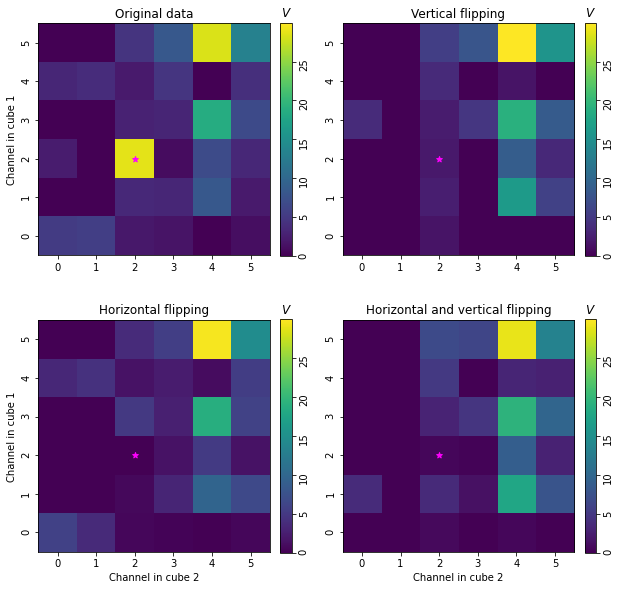

In [20]:
# Plotting jackknife tests
#
#
fig = plt.figure(figsize=(10.0, 10.0))
plt.rc('font', size=10)
ax1=plt.subplot(221)
ax1.set_title('Original data')
im=ax1.imshow(vplane, origin='lower',clim=[0.,maxV], interpolation='None')
ax1.scatter(indmax1, indmax2, marker='*', color='magenta')
ax1.set_xlabel(' '); ax1.set_ylabel('Channel in cube 1')
ax1.tick_params(axis='y',labelrotation=90)
cbl=plt.colorbar(im, fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$V$')
cbl.ax.tick_params(axis='y',labelrotation=90)
ax2=plt.subplot(222)
ax2.set_title('Vertical flipping')
im=ax2.imshow(vplane10, origin='lower',clim=[0.,maxV], interpolation='None')
ax2.scatter(indmax1, indmax2, marker='*', color='magenta')
ax2.set_xlabel(' '); ax2.set_ylabel(' ')
ax2.tick_params(axis='y',labelrotation=90)
cbl=plt.colorbar(im, fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$V$')
cbl.ax.tick_params(axis='y',labelrotation=90)
ax3=plt.subplot(223)
ax3.set_title('Horizontal flipping')
im=ax3.imshow(vplane01, origin='lower',clim=[0.,maxV], interpolation='None')
ax3.scatter(indmax1, indmax2, marker='*', color='magenta')
ax3.set_xlabel('Channel in cube 2'); ax3.set_ylabel('Channel in cube 1')
ax3.tick_params(axis='y',labelrotation=90)
cbl=plt.colorbar(im, fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$V$')
cbl.ax.tick_params(axis='y',labelrotation=90)
ax4=plt.subplot(224)
ax4.set_title('Horizontal and vertical flipping')
im=ax4.imshow(vplane11, origin='lower',clim=[0.,maxV], interpolation='None')
ax4.scatter(indmax1, indmax2, marker='*', color='magenta')
ax4.set_xlabel('Channel in cube 2'); ax4.set_ylabel(' ')
ax4.tick_params(axis='y',labelrotation=90)
cbl=plt.colorbar(im, fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$V$')
cbl.ax.tick_params(axis='y',labelrotation=90)
plt.show()